# NLP 

**In this project, I am applying NLP techniques to analyze the text of messages. The 'label' column classifies each message as either spam or ham. The 'message' column contains the text content of each message. The 'length' column indicates the total number of words in each message, and the 'punct' column quantifies the punctuation marks used.**

**My goal is to develop a model that can accurately identify spam messages based on these features. By examining the word count and punctuation patterns, I aim to train the model to recognize the typical characteristics that differentiate spam from ham messages. This approach is crucial for improving email or messaging filtering systems by effectively filtering out unwanted spam messages.**

**The project involves preprocessing the text data, extracting key features (like word count and punctuation), and training a machine learning model on these features to classify the messages. I plan to evaluate the effectiveness of my model using various metrics to ensure it achieves high accuracy and minimizes false positives in spam detection.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/nathan/Desktop/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep = '\t')
data.head(3)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6


In [13]:
print(data.label.value_counts(normalize= True))
print(f"\nAverage Punctuations in spam: {round(data[data.label == 'spam'].punct.mean(), 2)}")
print(f"Average Punctuations in ham: {round(data[data.label == 'ham'].punct.mean(), 2)}\n")
print(f"Average lenght in spam: {round(data[data.label == 'spam'].length.mean(), 2)}")
print(f"Average lenght in ham: {round(data[data.label == 'ham'].length.mean(), 2)}")

ham     0.865937
spam    0.134063
Name: label, dtype: float64

Average Punctuations in spam: 5.71
Average Punctuations in ham: 3.94

Average lenght in spam: 138.67
Average lenght in ham: 71.48


In [35]:
# dropping missing values
if data.message.isna().sum() > 0:
    data.dropna(inplace = True)
else:
    print('No missing values.')

No missing values.


In [36]:
# check for blanks values
blank = []

for i, one, sec, third, four in data.itertuples():
    if sec.isspace():
        blank.append(i)
        
if any(blank):
    print(f'There are {len(blank)} spaces as values.')
else:
    print(f'No spaces.')

No spaces.


In [30]:
# split data
from sklearn.model_selection import train_test_split

X = data.message
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Encode Text: `TF-IDF` (Term Frequency-Inverse Document Frequency)

TF-IDF is a more advanced technique that not only counts the frequency of words but also takes into account the importance of the word in the entire corpus of documents.

TF (Term Frequency): Frequency of a word in a document.
IDF (Inverse Document Frequency): Decreases the importance of words that appear frequently throughout the corpus, and increases that of rare words.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

clf = Pipeline([('vec', TfidfVectorizer()), ('model', LinearSVC())])
clf.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer()), ('model', LinearSVC())])

In [38]:
y_predict = clf.predict(X_test)

## Manual Evaluation & Make Prediction

In [57]:
data_true = pd.DataFrame(pd.concat([X_test, y_test], axis = 1).reset_index(drop = True))
data_true['Predict'] = y_predict
data_true = data_true.rename(columns = {'label': 'TrueValues'})
data_true.head()

,message,TrueValues,Predict
0,Squeeeeeze!! This is christmas hug.. If u lik ...,ham,ham
1,And also I've sorta blown him off a couple tim...,ham,ham
2,Mmm thats better now i got a roast down me! i...,ham,ham
3,Mm have some kanji dont eat anything heavy ok,ham,ham
4,So there's a ring that comes with the guys cos...,ham,ham


In [78]:
count = 0
for i, one, sec, third in data_true.itertuples():    
    if sec != third:
        count += 1
        
print(f'Total of wrongs answers:{count / len(data_true): .2f}% - {count} wrongs')

Total of wrongs answers: 0.01% - 13 wrongs


## Evaluation using Sklearn

The accuracy is: 0.99


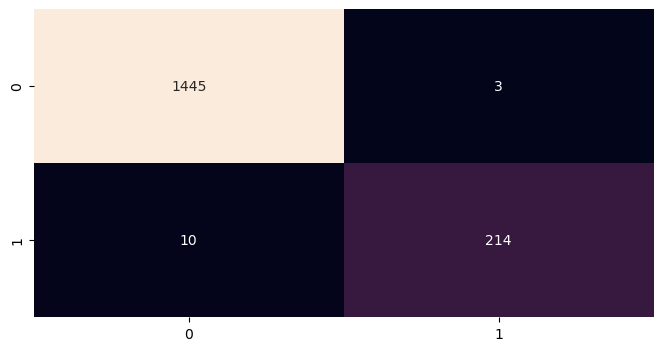

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'The accuracy is: {round(accuracy_score(y_pred = y_predict, y_true = y_test), 2)}')

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_predict), annot = True, cbar = False, fmt = 'g')
plt.show()

In [87]:
clf.predict(['Mm 098t6789 some kanji d!*@&*^#'])

array(['ham'], dtype=object)